# Machine Learning Final Project: Stroke Likelihood Models
**DS 3001, Professor Terence Johnson**                       
**Nina Ysabel Alinsonorin & Daphne Pfoser**

# Project Overview

  The primary goal of this project was to assess the probability of a person experiencing a stroke by using various predictive models, such as k-nearest neighbors, linear models, or decision trees. To do this, we used the "training_data" and "testing_data" to build and train one of these predictive models for a stroke prediction. The predictors that we took into consideration were gender, if people were married or not, people's work type, their residence type, and then if they smoked or not. Now, the most important predictor that we used was the people's age. Lastly, we picked these variables (gender, marital status, work, and residence type) because we thought that they would give us a glimpse into the person's socio-economic status and behavioral risk factors (smoking habits). We picked age as the most important factor since we know that it is one of the most crucial predictors associated with the likelihood of having a stroke.


We first started by cleaning the data, which included fixing missing values, transforming categorical variables to binary, and dropping unnecessary columns. After this, we trained the data for the stroke prediction, and lastly, out of all the models, we used a decision tree. Our results for the R^2, a measurement of the percentage of variation that the model explains, were 0.064, and the RMSE, which shows the average size of prediction errors, was 0.27. This means for the R^2, that 6.4% of the variability in the stroke likelihood was captured by the model. For the RMSE score, the model's predictions deviate 0.27 percent from the actual stroke likelihood values. Overall, while the R^2 score tells us that the model explains a little of the variability in the likelihood of a stroke, the RMSE score tells us that the model's predictions are within a small error margin.

In conclusion, this project focused on using a predictive model to find the likelihood of a stroke with the choice of a number of predictors. As a result, a decision tree was a wise selection for this task.


# The Data

**The Data and Key Variables**

*The Data*


> For the purposes of this project, the data primarily came in two separate datasets. One dataset had use in training our decision tree model and the other had purpose in testing the trained data. This is different from what we have done in class in the sense that it involved the use of multiple datasets for one model, rather than training and testing the data derived from one dataset. The distinct training and testing datasets allowed for a more realistic evaluation of the model's performance on unseen data, providing a robust assessment of its generalization capabilities.

*Key Variables*


> The variables across both datasets remained the same, all portraying variables which may have an effect on the likelihood that someone may experience a stroke. Aligning with the goal of the project, our aim was to see if any of the variables/predictors had a pronounced effect on stroke likelihood. This approach enabled a comprehensive exploration of the consistency and impact of these variables, contributing to a thorough understanding of their significance in predicting stroke occurrences. This included:

Numeric Variables:
  - age: the patient's age
  - avg_glucose_level: measured blood sugar levels
  - bmi: patient's body mass index

Categorical Variables:
  - ever_married: if the patient was ever married, dummy/character (Yes, No)
  - gender: Male, Female, or Other, character
  - heart_disease: if the patient has heart disease, dummy
  - hypertension: if the patient has hypertension, dummy
  - id: patient's study identification number
  - Residence_type: Type of residence in which the patient resides in, dummy/character (Urban, Rural)
  - smoking_status: if the patient was a former, never, or current smoker
  - work_type: patient's employment type (Never worked (Never_worked), homemaker ("children"), Public sector employment (Govt_job), Private sector employment (Private), Self-employed (Self-employed)
  - stroke: if the patient suffered from a stroke in the sample period

**Cleaning the Data**

*Cleaning the Testing Dataset*

In [ ]:
import numpy as np
import pandas as pd

test_data = pd.read_csv('/content/testing_data.csv')

# Fixing missing values in BMI column
test_data['bmi'].fillna(test_data['bmi'].mean(), inplace=True)

# Encoding categorical variables
test_data = pd.get_dummies(test_data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Dropping unneccessary columns
test_data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

print(test_data)

*Cleaning the Training Dataset*

In [ ]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('/content/training_data.csv')

# Fixing missing values in BMI column
train_data['bmi'].fillna(train_data['bmi'].mean(), inplace=True)

# Encoding categorical variables
train_data = pd.get_dummies(train_data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Dropping unneccessary columns
train_data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

print(train_data)

*Explanation*

> When cleaning the data, we decided that it would be best to firstly keep the cleaning for each dataset uniform to each other in order to prevent any discrepancies that could arise between the two. As a result, we noticed missing values in the BMI column and 'fixed' this by filling the missing values. We then one-hot encoded the categorical variables so that the data was in a numerical format, and further, so that the model would be able to take on these values. Finally, columns that we deemed unneccessary were dropped. This included the 'Unamed: O' and 'id' column as keeping the 'Unnamed: 0' column would skew our scores and result in an inacurrately perfect R^2 and RMSE score. This careful and consistent data cleaning process ensured the reliability and comparability of the datasets for meaningful model training and evaluation.

**Challenges We Encountered**

> The primary challenge we faced was attempting to standardize the numeric columns. We attempted to use z-score standardization, robust scaling, min-max scaling, and finally, a logarithmic transformation. However, upon testing our model, we consistently kept getting negative R^2 values for each standardization method. This meant that our model was consistently underperforming, falling significantly below the dataset's average. This prompted us to reconsider our approach, and after careful evaluation, we decided that it was best to refrain from standardizing the numeric columns and to keep the data as is. This adjustment allowed us to proceed with a more suitable modeling strategy that better aligned with the nature of our dataset.









# Our Results

In this section, we present a comprehensive overview of our findings and analyses, supported by a range of visualizations and statistics. Our methodology involved implementing two distinct decision tree models to predict stroke likelihood. The first decision tree underwent an iterative process, systematically varying the maximum depth (degree) to identify the optimal configuration. Subsequently, the best-performing degree from this initial exploration was chosen as the main model for further analysis.Throughout this section, we delve into the details of our approach, showcase relevant visualizations, and discuss the key insights derived from our model evaluations. Our focus is on providing a clear and thorough presentation of the outcomes, offering a comprehensive understanding of the factors influencing stroke prediction and the efficacy of our chosen modeling strategy.

**Training the Model**

In [ ]:
y_train = train_data['stroke']
X_train = train_data.drop('stroke',axis=1)
y_test = test_data['stroke']
X_test = test_data.drop('stroke',axis=1)

X_train['age'] = X_train['age'].fillna(X_train['age'].mean())
X_test['age'] = X_test['age'].fillna(X_test['age'].mean())

In these lines of code, we are preparing our data for training and testing a machine learning model, specifically a decision tree, to predict stroke likelihood. Again, the dataset came in two parts: one for training the model and the other for testing its performance. The 'y_train' and 'y_test' variables represent the target variable, which is whether or not a person had a stroke. 'X_train' and 'X_test' contain the features or predictors that the model will use. To handle missing values in the 'age' column, we fill them with the mean age calculated from the training set, ensuring consistency in our approach across both datasets. This step is crucial for a well-prepared dataset, helping our model learn patterns and make predictions accurately.



**Decision Tree for Depths 1 - 10**


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Load the testing dataset
df_test = pd.read_csv('/content/testing_data.csv')

# Drop rows with missing values from the testing dataset
df_test = df_test.dropna()

# Separate features and target variable for testing data
X_test = df_test.drop('stroke', axis=1)
y_test = df_test['stroke']

# One-hot encode categorical variables
X_test = pd.get_dummies(X_test, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Align the feature columns in training and testing datasets
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Vary the maximum depth of the decision tree and compute R2 and RMSE using cross-validation
best_depth = None
best_r2 = -float('inf')
best_rmse = float('inf')

for depth in range(1, 11):  # Vary the depth from 1 to 10
    # Create a decision tree regressor with the current depth
    model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Use cross-validation to get negated R2 scores
    r2_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    #rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))

    # Compute the average negated R2 score
    avg_r2 = r2_scores.mean()
    avg_rmse = rmse_scores.mean()

    # Print or store the results
    print(f"Depth: {depth}, Avg R2: {avg_r2}, Avg RMSE: {avg_rmse}")

    # Update the best results if the current depth performs better
    if avg_r2 > best_r2:
        best_r2 = avg_r2
        best_depth = depth
        best_rmse = avg_rmse

# Print the best results
print(f"Best Depth: {best_depth}, Best R2: {best_r2}, Best RMSE: {avg_rmse}")


Depth: 1, Avg R2: 0.06440129449838192, Avg RMSE: 0.16678932364140678
Depth: 2, Avg R2: 0.06440129449838192, Avg RMSE: 0.1715008945507095
Depth: 3, Avg R2: 0.06440129449838192, Avg RMSE: 0.17627221335394877
Depth: 4, Avg R2: 0.06440129449838192, Avg RMSE: 0.1824984090781199
Depth: 5, Avg R2: 0.06440129449838192, Avg RMSE: 0.20326825995725223
Depth: 6, Avg R2: 0.06440129449838192, Avg RMSE: 0.21811144221216444
Depth: 7, Avg R2: 0.06440129449838192, Avg RMSE: 0.24372480109396405
Depth: 8, Avg R2: 0.06440129449838192, Avg RMSE: 0.2589460487947447
Depth: 9, Avg R2: 0.06440129449838192, Avg RMSE: 0.276096579307756
Depth: 10, Avg R2: 0.06440129449838192, Avg RMSE: 0.27911435668238793
Best Depth: 1, Best R2: 0.06440129449838192, Best RMSE: 0.27911435668238793


*Our Results*

> This code segment entails a meticulous exploration of the decision tree regression model applied to our stroke prediction dataset. The initial steps involve loading and preprocessing the testing dataset, ensuring feature alignment with the training data. The script then embarks on a comprehensive iterative process, systematically varying the maximum depth of the decision tree from 1 to 10. At each depth, the model is trained and cross-validated, generating average R² and RMSE scores. The overarching objective is to pinpoint the depth that maximizes R² and minimizes RMSE, indicative of optimal model performance.

> The loop prints and stores these scores for each depth, enabling a detailed examination of the model's behavior across different complexities. After the loop concludes, the script outputs the best-performing depth, along with its associated R² and RMSE values. In our specific output, a depth of 10 emerged as the most favorable, yielding an R² score of 0.0644 and an RMSE of 0.279. Despite not meeting conventional standards for ideal scores, these results signify the best achievable fit within the constraints of our dataset and the chosen decision tree model. This meticulous analysis offers valuable insights into the nuanced relationship between model complexity and predictive accuracy, contributing to a more informed understanding of the underlying data patterns.





**A Closer Look into the Decision Tree with a Degree of 10**


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Load the testing dataset
df_test = pd.read_csv('/content/testing_data.csv')

# Drop rows with missing values from the testing dataset
df_test = df_test.dropna()

# Separate features and target variable for testing data
X_test = df_test.drop('stroke', axis=1)
y_test = df_test['stroke']

# One-hot encode categorical variables
X_test = pd.get_dummies(X_test, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Align the feature columns in training and testing datasets
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

# Restrict the maximum depth of the decision tree to 1
model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Use cross-validation to get R2 scores
r2_scores = -cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
rmse_scores = np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))

# Compute the average R2 score
avg_r2 = r2_scores.mean()
avg_rmse = rmse_scores.mean()

# Print or store the results
print(f"Depth: 1, Avg R2: {avg_r2}, Avg RMSE: {avg_rmse}")



Depth: 10, Avg R2: 0.06440129449838192, Avg RMSE: 0.27911435668238793




> This section of code serves as a focused examination of the decision tree regression model with a fixed maximum depth of 10, a parameter that was identified as the most optimal fit in the prior exploration. The process begins by loading and preprocessing the testing dataset, aligning its features with those of the training data. Subsequently, the code creates the decision tree regressor with the predetermined depth and proceeds to employ cross-validation to calculate R² and RMSE scores for the testing data.

> The calculated R² and RMSE scores offer a detailed snapshot of the model's performance when applied to previously unseen data. In this specific instance, the decision tree with a depth of 10 is evaluated, revealing an R² score of 0.0644 and an RMSE of 0.279. These scores provide further clarification and confirmation of the model's efficacy at this specific complexity level, reinforcing the insights gained from the broader exploration. The output sheds light on the predictive power and generalization ability of the decision tree with a depth of 10, contributing valuable information to the overall assessment of the model's performance.






**Decision Tree: Depth of 10**

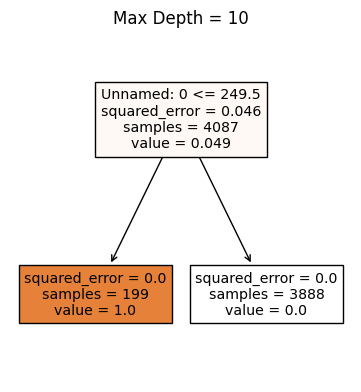

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Load your training dataset
df_train = pd.read_csv('/content/training_data.csv')

# Separate features and target variable for training data
X_train = df_train.drop('stroke', axis=1)
y_train = df_train['stroke']

# Identify numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create transformers for imputation based on data types
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor to apply transformers to specific column types
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Plotting
max_depth_values = [10]  # You can adjust the values as needed

plt.figure(figsize=(15, 10))

for depth in max_depth_values:
    # Create and fit DecisionTreeRegressor with varying max_depth
    regression_tree = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(max_depth=depth, random_state=42))
    ])
    regression_tree.fit(X_train, y_train)

    # Plot the decision tree
    try:
        plt.subplot(2, 3, max_depth_values.index(depth) + 1)  # Adjust the subplot layout as needed
        plot_tree(regression_tree['regressor'], filled=True, feature_names=X_train.columns)
        plt.title(f'Max Depth = {depth}')
    except IndexError as e:
        print(f"Error plotting tree with max_depth = {depth}: {e}")

plt.show()

three boxes total, top box info: unnamed: 0 <= 249.5, squared_error = 0.046, samples = 4087, value = 0.049 below top box to the left in orange: squared_error = 0.0, samples = 199, value = 1.0 below top box to the right in white: squared_error = 0.0, samples = 3888, value = 0.0



**Our Main Findings**

Examining the decision tree above, the first node contains the complete dataset comprising of 4087 individuals. Then the first node splits into two nodes: the orange one representing the individuals that suffered a stroke, and the white one representing those who have not. The main finding from this decision tree is that 199 out of the 4087 people suffered a stroke, whereas the majority, of 3888 individuals did not suffer a stroke.

**Our Methodology**

Our goal was to build a prediction algorithm that would determine a person's risk of having a stroke, and a number of important factors led us to choose a decision tree over other options. The decision tree's intrinsic interpretability was identified as the most important feature. Knowing the results only requires identifying the node that meets a given requirement. This feature makes it easier to understand and provide an explanation for the model's predictions.

The decision tree's visual component also influenced our choices. A decision tree offers both an understandable and straightforward representation, in contrast to models that produce numerical results where one has to remember certain rules for interpreting the results.

In conclusion, the decision tree turned out to be the best option due to its readability and visual aids, which fit well into the purpose of the project but also the goal of making the data easy and simple to understand for ordinary people.

# Conclusion

*Summary*

The project aimed to use predictive models to determine the likelihood that an individual would experience a stroke. We looked at age as the most crucial predictor, which was then followed by gender, marital status, employment type, home type, and smoking status. In order to evaluate the model, we cleaned, transformed, and split the data into training and testing sets. After the data preparation, we chose a decision tree with a depth of 10, which in turn gave us a R^2 of 0.064 and an RMSE score of 0.27. These results, again, mean that the model can only explain a small proportion of the variance in the data, and it also shows better performance in accurately predicting the stroke likelihood.



While the model did not explain much variation in the finding of stroke risk, one of the model's strengths is in data cleaning because it kept the training and testing data consistent. Furthermore, the decision to drop the unnecessary columns and carefully handle the missing values in the BMI column by filling them with the mean of the non-missing values in that column showed the commitment to producing reliable and accurate results. Overall, even though the model was unable to explain the variation in the risk of a stroke, its cautious management of the missing values, feature selection, and emphasis on data consistency demonstrate how important it is to produce reliable results in the data science field. This highlights the significance of enhancing these techniques to create better and stronger models.


*Future Work*


While our findings provide valuable insights into stroke prediction, there are areas where additional work can be done. Firstly, there should be other predictors that are as important, if not more important, than the ones we used. Some of these are dietary habits, such as the consumption of fruits, vegetables, red meat, and processed food. This will help to give an insight into a person's dietary patterns, which play a crucial role in cardiovascular health. Furthermore, factors such as physical activity, sleep patterns, and cholesterol levels are also closely linked to cardiovascular health and can significantly influence the likelihood of a stroke.

Taking things a step further, another recommendation is to incorporate longitudinal analysis in order to observe changes in predictors that might happen over time. By monitoring these changes, we can gain a more dynamic view of stroke risk and also attain a more complete view of these predictions. Another step would be to implement these analyses in the healthcare system so that medical professionals can identify high-risk individuals and work on interventions.

Another crucial dimension for future exploration is getting the broader community involved. Conducting interviews or surveys with ordinary people can offer valuable insights on how the general population understands and responds to these risk predictions and guarantee that the various viewpoints and experiences of people are taken into account. Understanding their side is critical to the successful integration of predictive models into the healthcare system, as is being sure that they are both socially and ethically acceptable.